***

## Pandas第一课作业

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Pandas1/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：在本周课程结束前，提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。
- 注意：该作业不计入分数，仅供巩固本堂课程知识点使用
***

- 同学姓名:<u>chenjiafeng</u>  
- 批改人：
- 情况总结:

***

## 作业

##### 说明：我们下面做的这一系列操作都属于数据预处理的范畴。在做实际machine learning问题的时候，很多时候我们都需要对数据进行预处理操作，方便后续的建模。


#### 1.构建三个Series，分别是一系列商品的单价，计量单位，和数量。至于是什么商品什么计量单位由大家自己决定。


In [8]:
import pandas as pd
from pandas import Series, DataFrame
s1=Series([100,200], index=['apple', 'orange'])
s1.name='price'
s2=Series(['kg','m'], index=['apple', 'orange'])
s2.name='unit'
s3=Series([10,4], index=['apple', 'orange'])
s3.name='number'
print(s1)
print('\n')
print(s2)
print()
print(s3)

apple     100
orange    200
Name: price, dtype: int64


apple     kg
orange     m
Name: unit, dtype: object

apple     10
orange     4
Name: number, dtype: int64


#### 2.然后把这三个Series合并成一个DataFrame

In [6]:
DataFrame({'price':s1, 'unit':s2, 'number':s3})

,number,price,unit
apple,10,100,kg
orange,4,200,m


#### 3.请同学们自行从yahoo finance下载一些股票数据，然后用read_csv载入并作出折线图


In [23]:
data =pd.read_csv('data/yahoo_finance.csv', index_col=0, parse_dates=[0])
data.head()




,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.423252,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.401170,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.371726,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.380927,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.391969,18362400.0


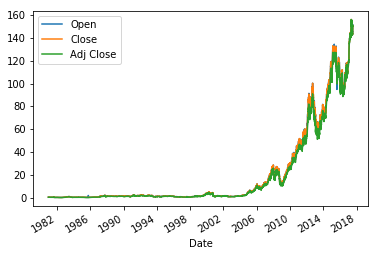

In [33]:
%matplotlib inline
df2=data[['Open', 'Close', 'Adj Close']]
df2.plot()

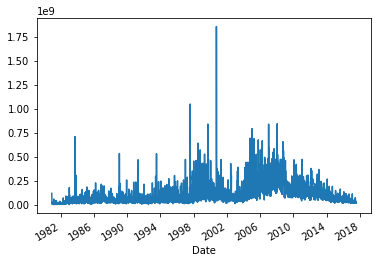

In [34]:
%matplotlib inline
data['Volume'].plot()

#### 4. 0.Teacher/data/文件夹下有个文件叫做titanic.csv ，这个文件包含了在titanic事件中乘客的存货情况。请把这个文件读入成一个pandas dataframe

In [76]:
titanic=pd.read_csv('data/titanic.csv', index_col=0)
print(type(titanic))
titanic.head()


<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 5.把每一列中的sex，sex为male的都改成1，sex为female的改成0,

In [77]:
titanic['Sex'] = titanic['Sex'].map({'male':1, 'female':0})
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S


#### 6.把Cabin中的NaN都填充成0 (使用fillna方法)

In [82]:
pds=titanic['Cabin']
pds.fillna(0, inplace=True)
#print(pds)
titanic.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S
6,0,3,"Moran, Mr. James",1,29.7,0,0,330877,8.4583,0,Q
7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,S


#### 7.现在我们想把乘客按照年龄做一个分类
- 年龄在0-11岁的为0类,12-22为1类，23-33为2类，34-44为3类，45-55为4类，56-66为5类，其余为6类
- 请做把Age改成乘客的年龄类别，如果年龄有缺失，就放入乘客的平均年龄


In [83]:
age=titanic['Age']
mean = float("%.2f" %age.mean())
titanic['Age'].fillna(mean, inplace=True)
def agemap(age):
    if age <=11:
        return 0
    elif age >=12 and age <=22:
        return 1
    elif age >=23 and age <=33:
        return 2
    elif age >= 34 and age <=44:
        return 3
    elif age >= 45 and age <= 55:
        return 4
    elif age >=56 and age <=66:
        return 5
    else:
        return 6


In [81]:
titanic['Age'] age.map(agemap))


PassengerId
1      1
2      3
3      2
4      3
5      3
6      2
7      4
8      0
9      2
10     1
11     0
12     5
13     1
14     3
15     1
16     4
17     0
18     2
19     2
20     2
21     3
22     3
23     1
24     2
25     0
26     3
27     2
28     1
29     2
30     2
      ..
862    1
863    4
864    2
865    2
866    3
867    2
868    2
869    2
870    0
871    2
872    4
873    2
874    4
875    2
876    1
877    1
878    1
879    2
880    5
881    2
882    2
883    1
884    2
885    2
886    3
887    2
888    1
889    2
890    2
891    2
Name: Age, Length: 891, dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S
6,0,3,"Moran, Mr. James",1,29.7,0,0,330877,8.4583,0,Q
7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,S
